In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/financial-sentiment-dataset.csv", encoding='iso-8859-1', names=["text", "label"])

In [5]:
df.head()

,text,label
0,Sentence,Sentiment
1,The GeoSolutions technology will leverage Bene...,positive
2,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
3,"For the last quarter of 2010 , Componenta 's n...",positive
4,According to the Finnish-Russian Chamber of Co...,neutral


In [6]:
df.drop(0, inplace=True)

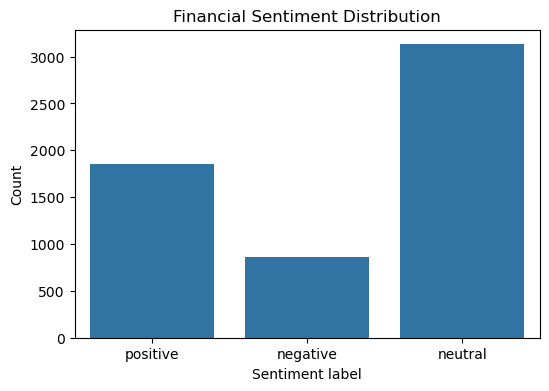

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label',)
plt.title("Financial Sentiment Distribution")
plt.xlabel("Sentiment label")
plt.ylabel("Count")
plt.show()

In [6]:
new_df = df[df['label'] != 'neutral'].reset_index(drop=True)

In [7]:
positive_df = new_df[new_df['label'] == 'positive']
negative_df = new_df[new_df['label'] != 'positive']

positive_df_reduced = positive_df.sample(frac=0.6, random_state=42)

new_df = pd.concat([negative_df, positive_df_reduced]).reset_index(drop=True)

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

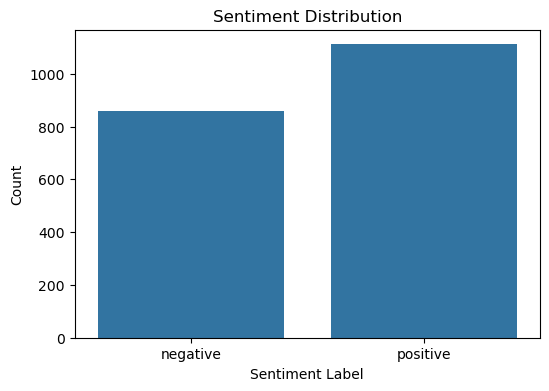

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=new_df,x="label")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

In [9]:
df = new_df

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import MultinomialNB
import re

In [11]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aspaaur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/aspaaur/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aspaaur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Initialize tools
lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

In [15]:
#Custom text preprocessinf function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[z-zA-Z\s]','',text)
     #tokenize
    tokens = word_tokenize(text)
    #remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] 
    return ' '.join(cleaned)

In [16]:
df['clean_text'] = df['text'].apply(preprocess)

In [17]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=32)

In [18]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.69      0.23      0.34       163
    positive       0.63      0.93      0.75       232

    accuracy                           0.64       395
   macro avg       0.66      0.58      0.55       395
weighted avg       0.65      0.64      0.58       395



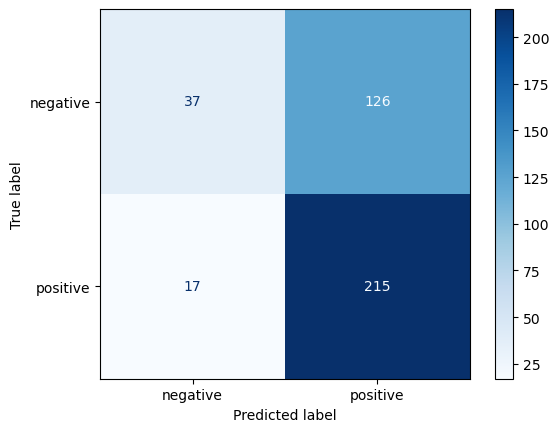

In [21]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = df['label'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [25]:
sample_text = "He is not working hard. So he won't play worldcup."

#preprocess
sample_text_cleaned = preprocess(sample_text)
#Vectorize
sample_vector = vectorizer.transform([sample_text_cleaned])
#predict
predicted_category = model.predict(sample_vector)
print("Predicted category: ", predicted_category[0])

Predicted category:  positive


In [ ]:
import pickle

with open("../model/sentiment_model.pkl", 'wb') as file:
    pickle.dump(model, file)

with open("../model/sentiment_vectorizer.pkl", 'wb') as file:
    pickle.dump(vectorizer, file)